<a href="https://colab.research.google.com/github/jarodchristiansen/Machine-Learning-Deep-Learning/blob/master/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d pkdarabi/medical-image-dataset-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection
License(s): Attribution 4.0 International (CC BY 4.0)
100% 113M/113M [00:04<00:00, 37.6MB/s]
100% 113M/113M [00:04<00:00, 26.6MB/s]


In [ ]:
!unzip medical-image-dataset-brain-tumor-detection.zip -d medical_images

Streaming output truncated to the last 5000 lines.
  inflating: medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels/volume_48_slice_32_jpg.rf.cced5cbc8b921e898d4d0f71be8a75ac.txt  
  inflating: medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels/volume_48_slice_33_jpg.rf.cc72924c053ce7036b49859909b25d52.txt  
  inflating: medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels/volume_48_slice_36_jpg.rf.a423037f6a6e46542d8d9e5a2225f048.txt  
  inflating: medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels/volume_48_slice_44_jpg.rf.755a157e8901c47ba8c26eff9d28f871.txt  
  inflating: medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels/volume_48_slice_47_jpg.rf.6cd0202771e033117b585a47d18df0da.txt  
  inflating: medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels/volume_48_slice_50_jpg.rf.01eb4f6c5df4a198ffa3ab41c820cb90.txt  
  inflating: medical_images/Tum

In [ ]:
!pip install opencv-python-headless Pillow albumentations

## Brain Tumor Kaggle Dataset 1

In [ ]:
import os
import pandas as pd
from PIL import Image

# Define the base directory where your data is stored
base_dir = '/content/medical_images/BrainTumorDetectionYolov9/BrainTumorDetectionYolov9'

# Create a function to load the data
def load_data(base_dir):
    data = []

    for split in ['train', 'valid', 'test']:
        images_dir = os.path.join(base_dir, split, 'images')
        labels_dir = os.path.join(base_dir, split, 'labels')

        for image_file in os.listdir(images_dir):
            if image_file.endswith('.jpg') or image_file.endswith('.jpeg'):
                image_path = os.path.join(images_dir, image_file)
                label_file = image_file.replace('.jpg', '.txt').replace('.jpeg', '.txt')
                label_path = os.path.join(labels_dir, label_file)

                # Load the label from the txt file
                with open(label_path, 'r') as f:
                    label = f.read().strip()

                data.append((image_path, label))

    # Convert to a pandas DataFrame for easy handling
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    return df

# Create a function to load the data
def load_training_data(train_dir):
    data = []

    images_dir = os.path.join(base_dir, 'train', 'images')
    labels_dir = os.path.join(base_dir, 'train', 'labels')

    for image_file in os.listdir(images_dir):
            if image_file.endswith('.jpg') or image_file.endswith('.jpeg'):
                image_path = os.path.join(images_dir, image_file)
                label_file = image_file.replace('.jpg', '.txt').replace('.jpeg', '.txt')
                label_path = os.path.join(labels_dir, label_file)

                # Load the label from the txt file
                with open(label_path, 'r') as f:
                    label = f.read().strip()

                data.append((image_path, label))

    # Convert to a pandas DataFrame for easy handling
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    return df


# Load your data
full_df = load_data(base_dir)
train_df = load_training_data(base_dir)

print(train_df.head())


                                          image_path  \
0  /content/medical_images/BrainTumorDetectionYol...   
1  /content/medical_images/BrainTumorDetectionYol...   
2  /content/medical_images/BrainTumorDetectionYol...   
3  /content/medical_images/BrainTumorDetectionYol...   
4  /content/medical_images/BrainTumorDetectionYol...   

                                               label  
0  0 0.302158273381295 0.3446969696969697 0.41726...  
1  0 0.32014388489208634 0.38636363636363635 0.35...  
2  1 0.35251798561151076 0.7348484848484849 0.302...  
3  1 0.29136690647482016 0.29924242424242425 0.05...  
4  0 0.5467625899280576 0.17424242424242425 0.546...  


In [ ]:
train_df

image_path  \
0     /content/medical_images/BrainTumorDetectionYol...   
1     /content/medical_images/BrainTumorDetectionYol...   
2     /content/medical_images/BrainTumorDetectionYol...   
3     /content/medical_images/BrainTumorDetectionYol...   
4     /content/medical_images/BrainTumorDetectionYol...   
...                                                 ...   
6925  /content/medical_images/BrainTumorDetectionYol...   
6926  /content/medical_images/BrainTumorDetectionYol...   
6927  /content/medical_images/BrainTumorDetectionYol...   
6928  /content/medical_images/BrainTumorDetectionYol...   
6929  /content/medical_images/BrainTumorDetectionYol...   

                                                  label  
0     0 0.302158273381295 0.3446969696969697 0.41726...  
1     0 0.32014388489208634 0.38636363636363635 0.35...  
2     1 0.35251798561151076 0.7348484848484849 0.302...  
3     1 0.29136690647482016 0.29924242424242425 0.05...  
4     0 0.5467625899280576 0.17424242424242425 0.546...  
...                                                 ...  
6925  1 0.42805755395683454 0.7462121212121212 0.122...  
6926  1 0.4064748201438849 0.7765151515151515 0.2517...  
6927  1 0.38848920863309355 0.7272727272727273 0.100...  
6928  0 0.11510791366906475 0.4583333333333333 0.100...  
6929  0 0.6654676258992805 0.6098484848484849 0.1654...  

[6930 rows x 2 columns]

In [ ]:
train_df.describe()

image_path label
count                                                6930  6930
unique                                               6930  6838
top     /content/medical_images/BrainTumorDetectionYol...      
freq                                                    1    79

### Pre-processing the images

/content/medical_images/BrainTumorDetectionYolov9/BrainTumorDetectionYolov9/train/images/volume_274_slice_118_jpg.rf.f5af15944188543c9e66b2c33dbc6877.jpg IN preprocess image


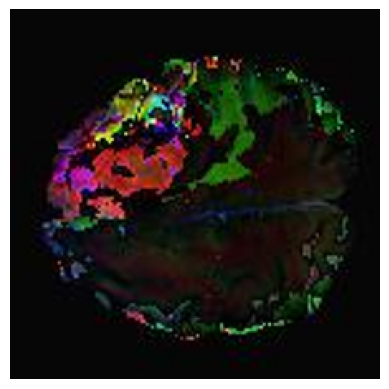

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt

# Define the preprocessing pipeline
def preprocess_image(image_path, size=(224, 224)):
    print(image_path, 'IN preprocess image')
    image = Image.open(image_path)
    image = image.resize(size)
    return image

# Example usage: preprocess first image
image_path = train_df['image_path'].iloc[0]
image = preprocess_image(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

#### Augmentation

In [ ]:
# Define augmentations
train_transforms = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    # A.RandomBrightnessContrast(p=0.05),
    A.Rotate(limit=20),
    A.Normalize(),
    # ToTensorV2()
])

# Example usage of augmentation
def augment_image(image_path):
    print(image_path, 'IN AUGMENT IMAGE')
    image = cv2.imread(image_path)
    augmented = train_transforms(image=image)['image']
    return augmented

augmented_image = augment_image(image_path)


/content/medical_images/BrainTumorDetectionYolov9/BrainTumorDetectionYolov9/train/images/volume_274_slice_118_jpg.rf.f5af15944188543c9e66b2c33dbc6877.jpg IN AUGMENT IMAGE


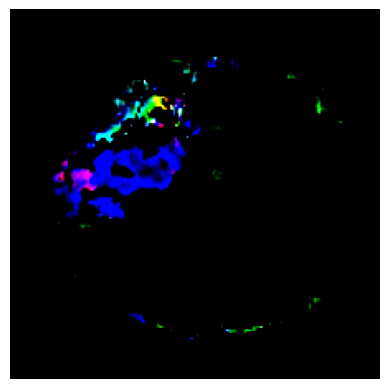

In [ ]:
# Display the image using Matplotlib
plt.imshow(augmented_image)
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a generator with augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
)

# Load images from directory
train_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode=None
)

valid_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'valid'),
    target_size=(224, 224),
    batch_size=32,
    class_mode=None
)


Found 6930 images belonging to 2 classes.
Found 1980 images belonging to 2 classes.


In [ ]:
len(train_df['image_path'])

6930

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf

class DetectionDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_dir, label_dir, batch_size, img_size, augmentation=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.augmentation = augmentation
        self.image_paths = os.listdir(image_dir)

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_image_paths = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = []
        batch_labels = []

        for image_path in batch_image_paths:
            image = cv2.imread(os.path.join(self.image_dir, image_path))
            label = self.load_label(image_path)
            if self.augmentation:
                augmented = self.augmentation(image=image, bboxes=label)
                image = augmented['image']
                label = augmented['bboxes']

            image = cv2.resize(image, self.img_size)
            batch_images.append(image)
            batch_labels.append(label)

        return np.array(batch_images), np.array(batch_labels)

    def load_label(self, image_path):
        label_path = os.path.join(self.label_dir, image_path.replace('.jpg', '.txt'))
        with open(label_path, 'r') as f:
            bboxes = [list(map(float, line.strip().split())) for line in f]
        return bboxes



In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# # Preprocessing function for images and labels
# def preprocess_data(df, batch_size, img_size):
#     while True:
#         for start in range(0, len(df), batch_size):
#             end = min(start + batch_size, len(df))
#             batch_df = df[start:end]
#             batch_images = []
#             batch_labels = []

#             for i, row in batch_df.iterrows():
#                 image = cv2.imread(row['image_path'])
#                 image = cv2.resize(image, img_size)
#                 batch_images.append(image)

#                 # Extract bounding box from 'label' column
#                 label = row['label']
#                 batch_labels.append(label)

#             yield np.array(batch_images), np.array(batch_labels)

def preprocess_data(df, batch_size, img_size):
    while True:
        for start in range(0, len(df), batch_size):
            end = min(start + batch_size, len(df))
            batch_df = df[start:end]
            batch_images = []
            batch_labels = []

            for i, row in batch_df.iterrows():
                image = cv2.imread(row['image_path'])
                image = cv2.resize(image, img_size)
                image = image / 255.0  # Normalize image to [0, 1]
                batch_images.append(image)

                label = row['label']  # Ensure this is a numerical list/array
                batch_labels.append(label)

            yield np.array(batch_images, dtype=np.float32), np.array(batch_labels, dtype=np.float32)


# Example usage: Create the data generator
train_gen = preprocess_data(train_df, BATCH_SIZE, IMG_SIZE)


In [ ]:
train_gen

<generator object preprocess_data at 0x7fc67c376c00>

In [ ]:
def build_model(input_shape):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze base layers for transfer learning

    # Add custom head for bounding box prediction
    x = Flatten()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)

    # Output layer with 4 units for bounding box (x_min, y_min, x_max, y_max)
    bbox_output = Dense(4, activation='linear', name='bbox')(x)

    model = Model(inputs=base_model.input, outputs=bbox_output)
    return model

# Build the model
model = build_model(input_shape=(224, 224, 3))

# Compile the model with loss and optimizer
model.compile(optimizer='adam', loss='mean_squared_error')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Define number of steps per epoch
steps_per_epoch = len(train_df) // BATCH_SIZE


# Train the model
model.fit(train_gen, epochs=10, steps_per_epoch=steps_per_epoch)


ValueError: Invalid dtype: str7744

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize prediction
def visualize_prediction(image_path, true_bbox, pred_bbox):
    image = cv2.imread(image_path)
    image = cv2.resize(image, IMG_SIZE)

    # Draw the true bounding box (in green)
    cv2.rectangle(image,
                  (int(true_bbox[0]), int(true_bbox[1])),
                  (int(true_bbox[2]), int(true_bbox[3])),
                  (0, 255, 0), 2)

    # Draw the predicted bounding box (in red)
    cv2.rectangle(image,
                  (int(pred_bbox[0]), int(pred_bbox[1])),
                  (int(pred_bbox[2]), int(pred_bbox[3])),
                  (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
for i in range(5):
    image_path = train_df['image_path'].iloc[i]
    true_bbox = train_df['label'].iloc[i]
    pred_bbox = model.predict(np.expand_dims(cv2.resize(cv2.imread(image_path), IMG_SIZE), axis=0))[0]

    visualize_prediction(image_path, true_bbox, pred_bbox)


## Brain Tumor Kaggle Dataset 2

This method is taken from an example on Kaggle. It uses pre-trained yolovn model from ultralytics and trains it on the dataset. This model is used for object localization and object detection

Reference: https://www.kaggle.com/code/pkdarabi/brain-tumor-detection-with-yolov8/notebook

Ultralytics: https://hub.ultralytics.com/signup

In [ ]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [ ]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.0MB/s]


#### Loads data from yaml file in dataset, trains model

In [ ]:
# Define the dataset_path

yaml_file_path = '/content/medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml'

# Train the model on our custom dataset
results = T_Model.train( data= yaml_file_path,epochs=50,patience=20, batch= -1, optimizer='auto')


Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml, epochs=50, time=None, patience=20, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

100%|██████████| 755k/755k [00:00<00:00, 17.1MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:03<00:00, 1923.40it/s]


train: New cache created: /content/medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:02<00:00, 978.65it/s]


val: New cache created: /content/medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.51G      1.804      2.968      1.901         61        640: 100%|██████████| 97/97 [02:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.36s/it]


                   all       1980       4380      0.866      0.121      0.166     0.0603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.22G      1.708      2.216      1.799         73        640: 100%|██████████| 97/97 [02:04<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]


                   all       1980       4380      0.238      0.268      0.196     0.0701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.22G      1.744      2.062      1.836         85        640: 100%|██████████| 97/97 [02:02<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.39s/it]


                   all       1980       4380      0.287      0.271      0.202     0.0664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       9.2G      1.728      1.944      1.816         75        640: 100%|██████████| 97/97 [02:03<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]


                   all       1980       4380      0.462      0.421      0.409      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.19G      1.688      1.816      1.798         76        640: 100%|██████████| 97/97 [02:08<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]


                   all       1980       4380      0.565      0.364      0.385      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      9.19G      1.658      1.724      1.771         62        640: 100%|██████████| 97/97 [02:09<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

                   all       1980       4380      0.608      0.437      0.468      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       9.2G      1.653      1.688      1.768         60        640: 100%|██████████| 97/97 [02:02<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]


                   all       1980       4380      0.696       0.51      0.558      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       9.2G      1.614      1.596      1.737         78        640: 100%|██████████| 97/97 [02:04<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.49s/it]


                   all       1980       4380      0.631      0.495      0.522      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      9.21G      1.605      1.545      1.722         65        640: 100%|██████████| 97/97 [02:01<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.64s/it]


                   all       1980       4380      0.668      0.503      0.539      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.18G      1.587      1.527       1.73         76        640: 100%|██████████| 97/97 [02:04<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.49s/it]


                   all       1980       4380      0.705      0.531      0.581      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.19G      1.583      1.492      1.707         79        640: 100%|██████████| 97/97 [02:02<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

                   all       1980       4380      0.721      0.532      0.589      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      9.18G      1.562      1.463       1.69         62        640: 100%|██████████| 97/97 [01:59<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:24<00:00,  1.74s/it]


                   all       1980       4380      0.742      0.557      0.625       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.18G      1.549      1.428       1.68         56        640: 100%|██████████| 97/97 [02:02<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.55s/it]


                   all       1980       4380      0.718      0.541        0.6      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      9.11G      1.518       1.38      1.661         76        640: 100%|██████████| 97/97 [02:07<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.55s/it]

                   all       1980       4380      0.738      0.568      0.627      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      9.19G      1.517      1.368      1.667         78        640: 100%|██████████| 97/97 [02:04<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.70s/it]


                   all       1980       4380      0.746      0.565      0.627       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      9.19G      1.504      1.335      1.658         53        640: 100%|██████████| 97/97 [02:02<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:27<00:00,  1.97s/it]


                   all       1980       4380      0.769      0.564      0.638      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      9.21G      1.499      1.316      1.649         64        640: 100%|██████████| 97/97 [02:04<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:27<00:00,  1.99s/it]


                   all       1980       4380      0.729       0.57      0.624      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      9.19G      1.485      1.296      1.623         58        640: 100%|██████████| 97/97 [02:04<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:25<00:00,  1.80s/it]


                   all       1980       4380       0.74      0.538      0.613      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      9.18G      1.461      1.275       1.61         64        640: 100%|██████████| 97/97 [02:23<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.66s/it]


                   all       1980       4380      0.787      0.557      0.638      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      9.21G       1.46      1.265      1.611         74        640: 100%|██████████| 97/97 [02:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

                   all       1980       4380      0.771      0.589      0.658      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      9.18G      1.459      1.251      1.609         73        640: 100%|██████████| 97/97 [02:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.50s/it]


                   all       1980       4380      0.781      0.613      0.676      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.16G      1.431      1.238      1.593         75        640: 100%|██████████| 97/97 [02:12<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

                   all       1980       4380      0.802      0.609      0.686      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.18G      1.424      1.203      1.589         56        640: 100%|██████████| 97/97 [02:08<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.28s/it]


                   all       1980       4380      0.788      0.625      0.693      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.21G      1.402       1.17       1.57         70        640: 100%|██████████| 97/97 [02:07<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:16<00:00,  1.21s/it]


                   all       1980       4380      0.783       0.62       0.69      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       9.2G       1.41      1.192       1.57         76        640: 100%|██████████| 97/97 [02:08<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.67s/it]


                   all       1980       4380      0.799      0.624      0.687      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       9.2G      1.398      1.155      1.562         64        640: 100%|██████████| 97/97 [02:08<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.55s/it]


                   all       1980       4380      0.815      0.626      0.701      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.21G      1.382      1.146      1.557         88        640: 100%|██████████| 97/97 [02:05<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.56s/it]


                   all       1980       4380      0.813      0.622      0.693      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      9.18G      1.377      1.131      1.548         73        640: 100%|██████████| 97/97 [02:05<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.46s/it]

                   all       1980       4380      0.811      0.634      0.707      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      9.18G      1.359      1.118      1.531         68        640: 100%|██████████| 97/97 [02:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]


                   all       1980       4380      0.835      0.642      0.718      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       9.2G      1.359      1.105      1.531         57        640: 100%|██████████| 97/97 [02:11<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.49s/it]

                   all       1980       4380      0.836       0.64      0.717      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      9.18G      1.337      1.104      1.523         63        640: 100%|██████████| 97/97 [02:07<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

                   all       1980       4380      0.813      0.642      0.714      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      9.19G      1.337      1.094      1.517         81        640: 100%|██████████| 97/97 [02:08<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.62s/it]

                   all       1980       4380      0.836      0.644      0.722      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.19G      1.323      1.054      1.497         70        640: 100%|██████████| 97/97 [02:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.33s/it]


                   all       1980       4380       0.83      0.652      0.726      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      9.18G      1.316      1.052      1.497         49        640: 100%|██████████| 97/97 [02:10<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.45s/it]


                   all       1980       4380      0.828      0.659      0.731      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       9.2G      1.302      1.035      1.493         77        640: 100%|██████████| 97/97 [02:06<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.46s/it]

                   all       1980       4380      0.831      0.662      0.733      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      9.16G      1.296      1.032      1.482         64        640: 100%|██████████| 97/97 [02:06<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.43s/it]

                   all       1980       4380      0.834      0.665      0.738      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      9.18G      1.287      1.009      1.472         80        640: 100%|██████████| 97/97 [02:06<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

                   all       1980       4380      0.831      0.681      0.743      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.19G      1.271     0.9971      1.463         68        640: 100%|██████████| 97/97 [02:10<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

                   all       1980       4380      0.835      0.673      0.744      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       9.2G      1.255     0.9881      1.453         62        640: 100%|██████████| 97/97 [02:09<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.43s/it]


                   all       1980       4380      0.843      0.677      0.752      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      9.19G      1.261     0.9891      1.458         70        640: 100%|██████████| 97/97 [02:03<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:23<00:00,  1.65s/it]


                   all       1980       4380       0.85      0.677      0.749      0.457
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      9.11G      1.245     0.8999      1.539         41        640: 100%|██████████| 97/97 [01:59<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:22<00:00,  1.58s/it]


                   all       1980       4380      0.859      0.675      0.753       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      9.03G      1.207     0.8584      1.508         33        640: 100%|██████████| 97/97 [01:54<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

                   all       1980       4380      0.858      0.674      0.754       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      9.11G      1.189     0.8441      1.495         47        640: 100%|██████████| 97/97 [01:51<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:21<00:00,  1.54s/it]

                   all       1980       4380      0.865      0.678      0.759       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      9.11G      1.173      0.835       1.48         42        640: 100%|██████████| 97/97 [01:55<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.48s/it]

                   all       1980       4380      0.856      0.688      0.762       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       9.1G      1.155     0.8213       1.47         42        640: 100%|██████████| 97/97 [01:53<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

                   all       1980       4380      0.859      0.691      0.763       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      9.11G      1.137     0.8001      1.455         45        640: 100%|██████████| 97/97 [01:52<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

                   all       1980       4380      0.853      0.695      0.766      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       9.1G      1.129     0.7909      1.442         39        640: 100%|██████████| 97/97 [01:54<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

                   all       1980       4380      0.873      0.686      0.768       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      9.03G      1.123      0.786      1.433         36        640: 100%|██████████| 97/97 [01:55<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]


                   all       1980       4380      0.859      0.697      0.769       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      9.03G      1.108     0.7726      1.431         40        640: 100%|██████████| 97/97 [01:56<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

                   all       1980       4380      0.874      0.691       0.77      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       9.1G      1.101     0.7719       1.43         43        640: 100%|██████████| 97/97 [01:54<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

                   all       1980       4380      0.869      0.693      0.772      0.483



50 epochs completed in 2.035 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:30<00:00,  2.15s/it]


                   all       1980       4380      0.868      0.694      0.772      0.483
                label0       1246       1246      0.825      0.601        0.7      0.392
                label1       1944       1944      0.903      0.805      0.863      0.602
                label2       1190       1190      0.878      0.676      0.753      0.457
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


#### Analyze the output of the best trained model from 50 epochs

#### Load model from weights

In [ ]:
# Define the path to the directory
post_training_files_path = '/content/runs/detect/train/'

# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels.cache... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [00:21<00:00,  5.84it/s]


                   all       1980       4380      0.867      0.694      0.772      0.484
                label0       1246       1246      0.824      0.603        0.7      0.391
                label1       1944       1944        0.9      0.805      0.863      0.602
                label2       1190       1190      0.876      0.676      0.753      0.458
Speed: 0.4ms preprocess, 3.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics

Metric Value
metrics/precision(B)      0.866613
metrics/recall(B)         0.694295
metrics/mAP50(B)          0.772075
metrics/mAP50-95(B)       0.483716
fitness                   0.512552

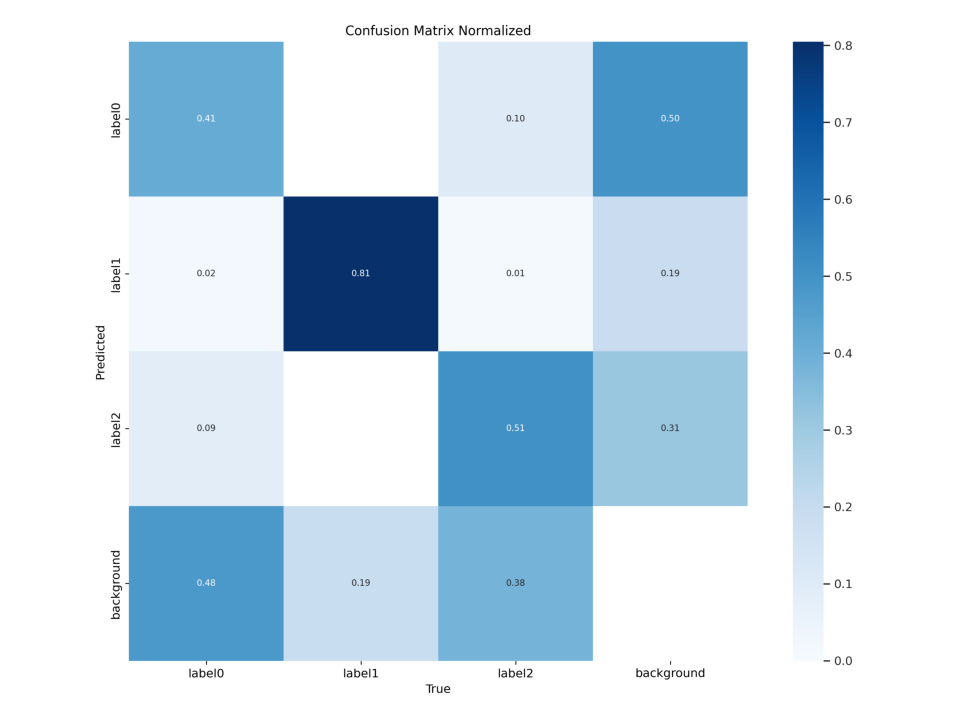

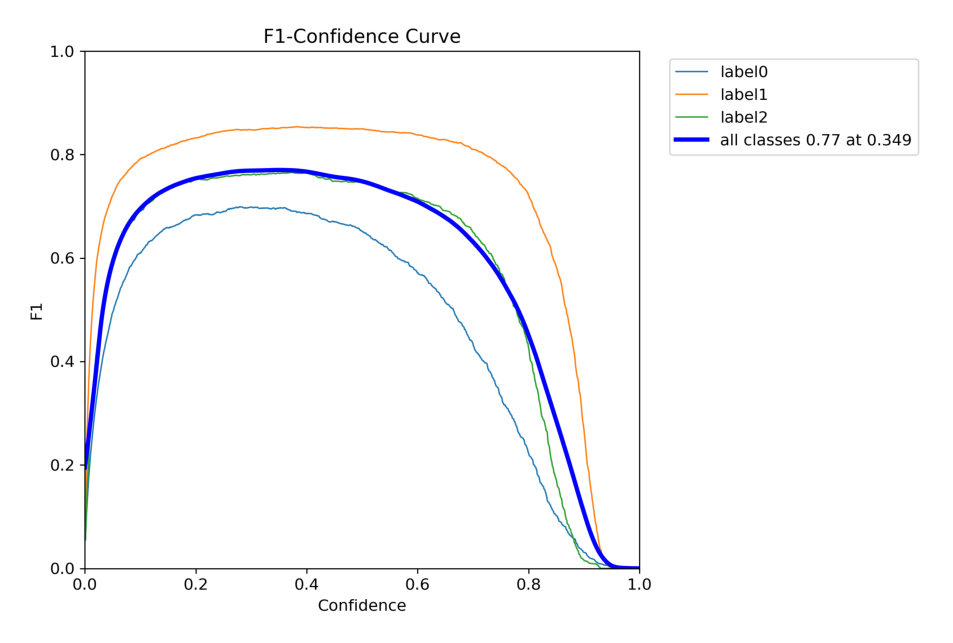

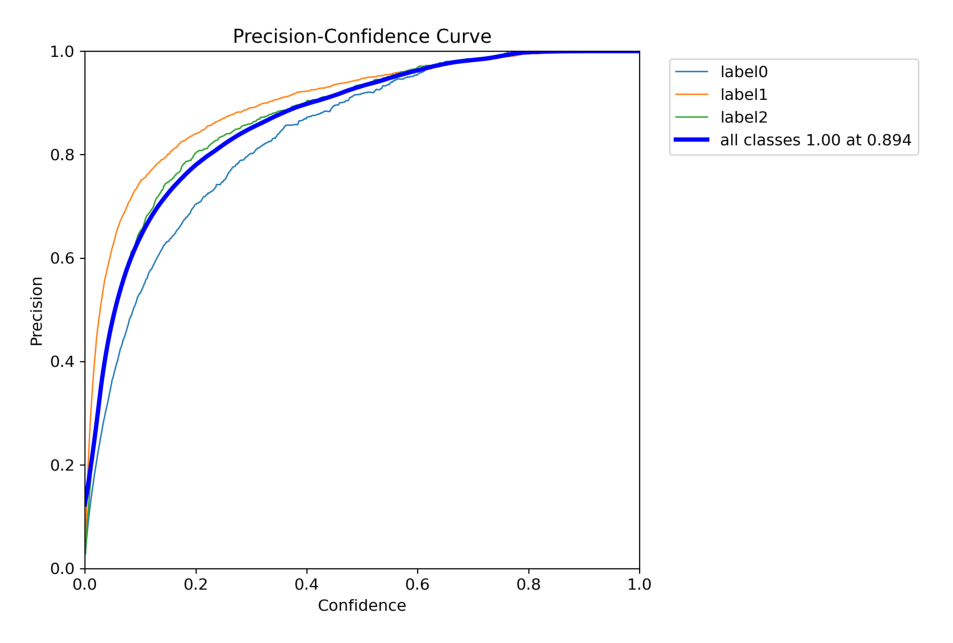

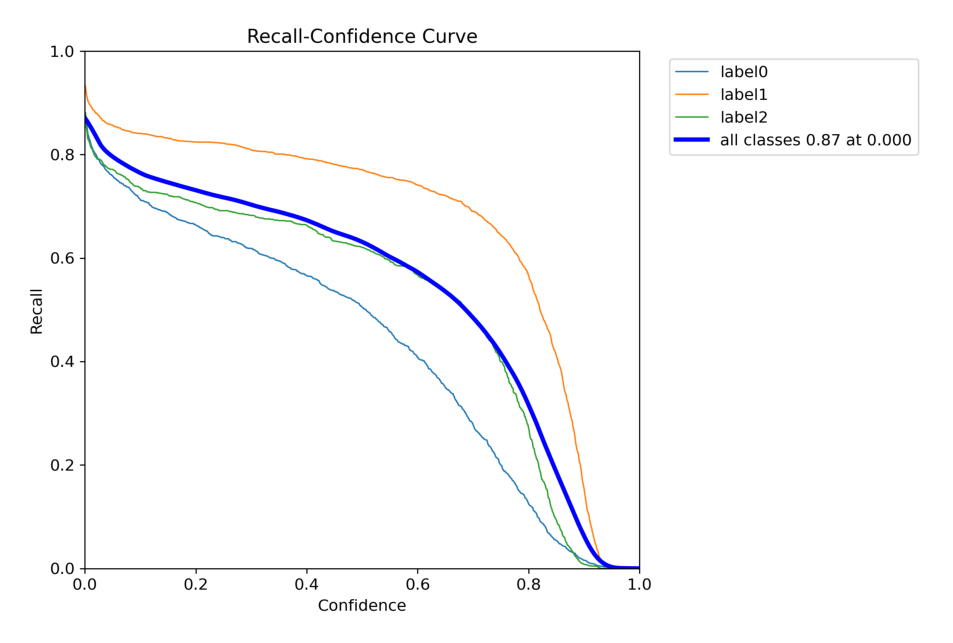

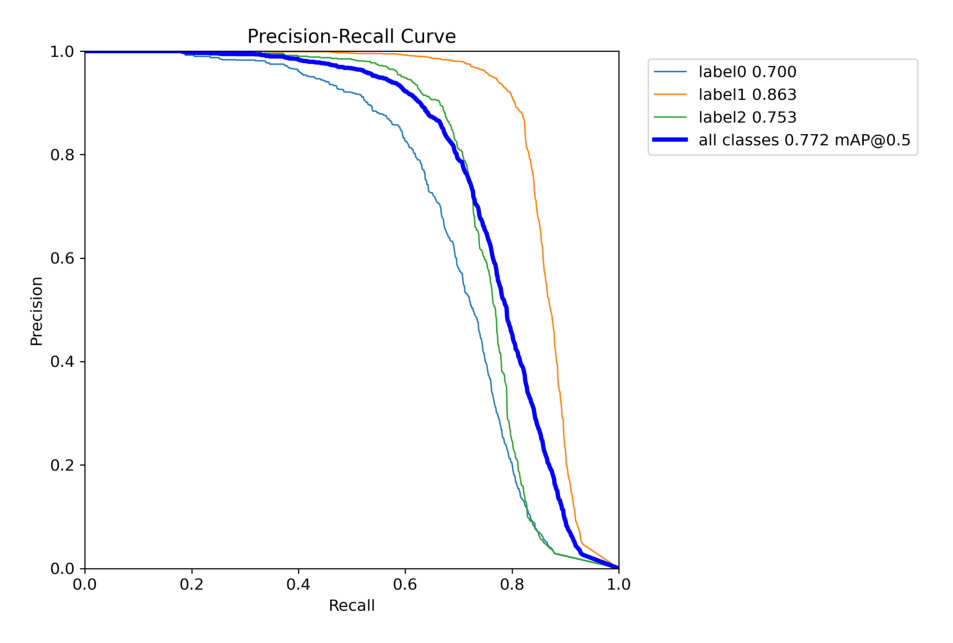

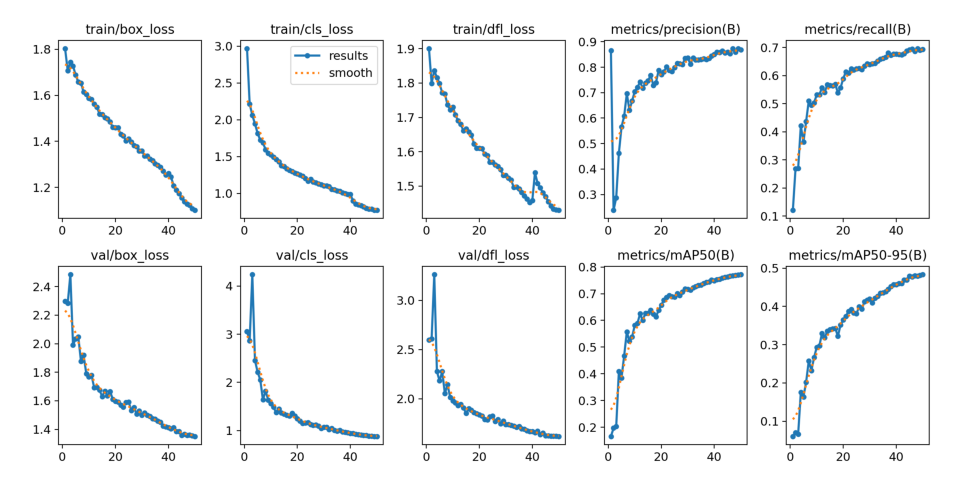

In [ ]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#9b63b8'}, style='darkgrid')

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

#### Inference model on unseen images

load the model and have it predict/infer on the test dataset. Renders bounding boxes on the images within the supplied step sizes

In [ ]:
# Validation of Model by TestSet

# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)



# Path to validation images
dataset_path = '/content/medical_images/TumorDetectionYolov8/OD8/Brain Tumor Detection'
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

def infer_images():
  # Check if there are images in the directory
  if len(image_files) > 0:
      # Select 9 images at equal intervals
      num_images = len(image_files)
      step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
      selected_images = [image_files[i] for i in range(0, num_images, step_size)]

      # Prepare subplots
      fig, axes = plt.subplots(3, 3, figsize=(20, 21))
      fig.suptitle('TEST Set Inferences', fontsize=24)

      for i, ax in enumerate(axes.flatten()):
          if i < len(selected_images):
              image_path = os.path.join(valid_images_path, selected_images[i])

              # Load image
              image = cv2.imread(image_path)

              # Check if the image is loaded correctly
              if image is not None:
                  # Resize image
                  resized_image = resize_image(image, size=(640, 640))
                  # Normalize image
                  normalized_image = normalize_image(resized_image)

                  # Convert the normalized image to uint8 data type
                  normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                  # Predict with the model
                  results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                  print(results, "results from predict")

                  # Plot image with labels
                  annotated_image = results[0].plot(line_width=1)
                  # annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                  ax.imshow(annotated_image)
              else:
                  print(f"Failed to load image {image_path}")
          ax.axis('off')

      plt.tight_layout()
      plt.show()


def infer_single_image(index):
        # Prepare subplots
        fig, axes = plt.subplots(2, 2, figsize=(12, 13))
        fig.suptitle('TEST Set Inferences', fontsize=24)


        for i, ax in enumerate(axes.flatten()):
          if i < len(image_files[index]):
              image_path = os.path.join(valid_images_path, image_files[index])

              # Load image
              image = cv2.imread(image_path)

              # Check if the image is loaded correctly
              if image is not None:
                  # Resize image
                  resized_image = resize_image(image, size=(640, 640))
                  # Normalize image
                  normalized_image = normalize_image(resized_image)

                  # Convert the normalized image to uint8 data type
                  normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                  # Predict with the model
                  results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                  print(results[0], "results from predict")

                  # Plot image with labels
                  annotated_image = results[0].plot(line_width=1)
                  # annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                  ax.imshow(annotated_image)
              else:
                  print(f"Failed to load image {image_path}")
          ax.axis('off')

        plt.tight_layout()
        plt.show()


0: 640x640 1 label1, 18.1ms
Speed: 2.5ms preprocess, 18.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'label0', 1: 'label1', 2: 'label2'}
obb: None
orig_img: array([[[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
    

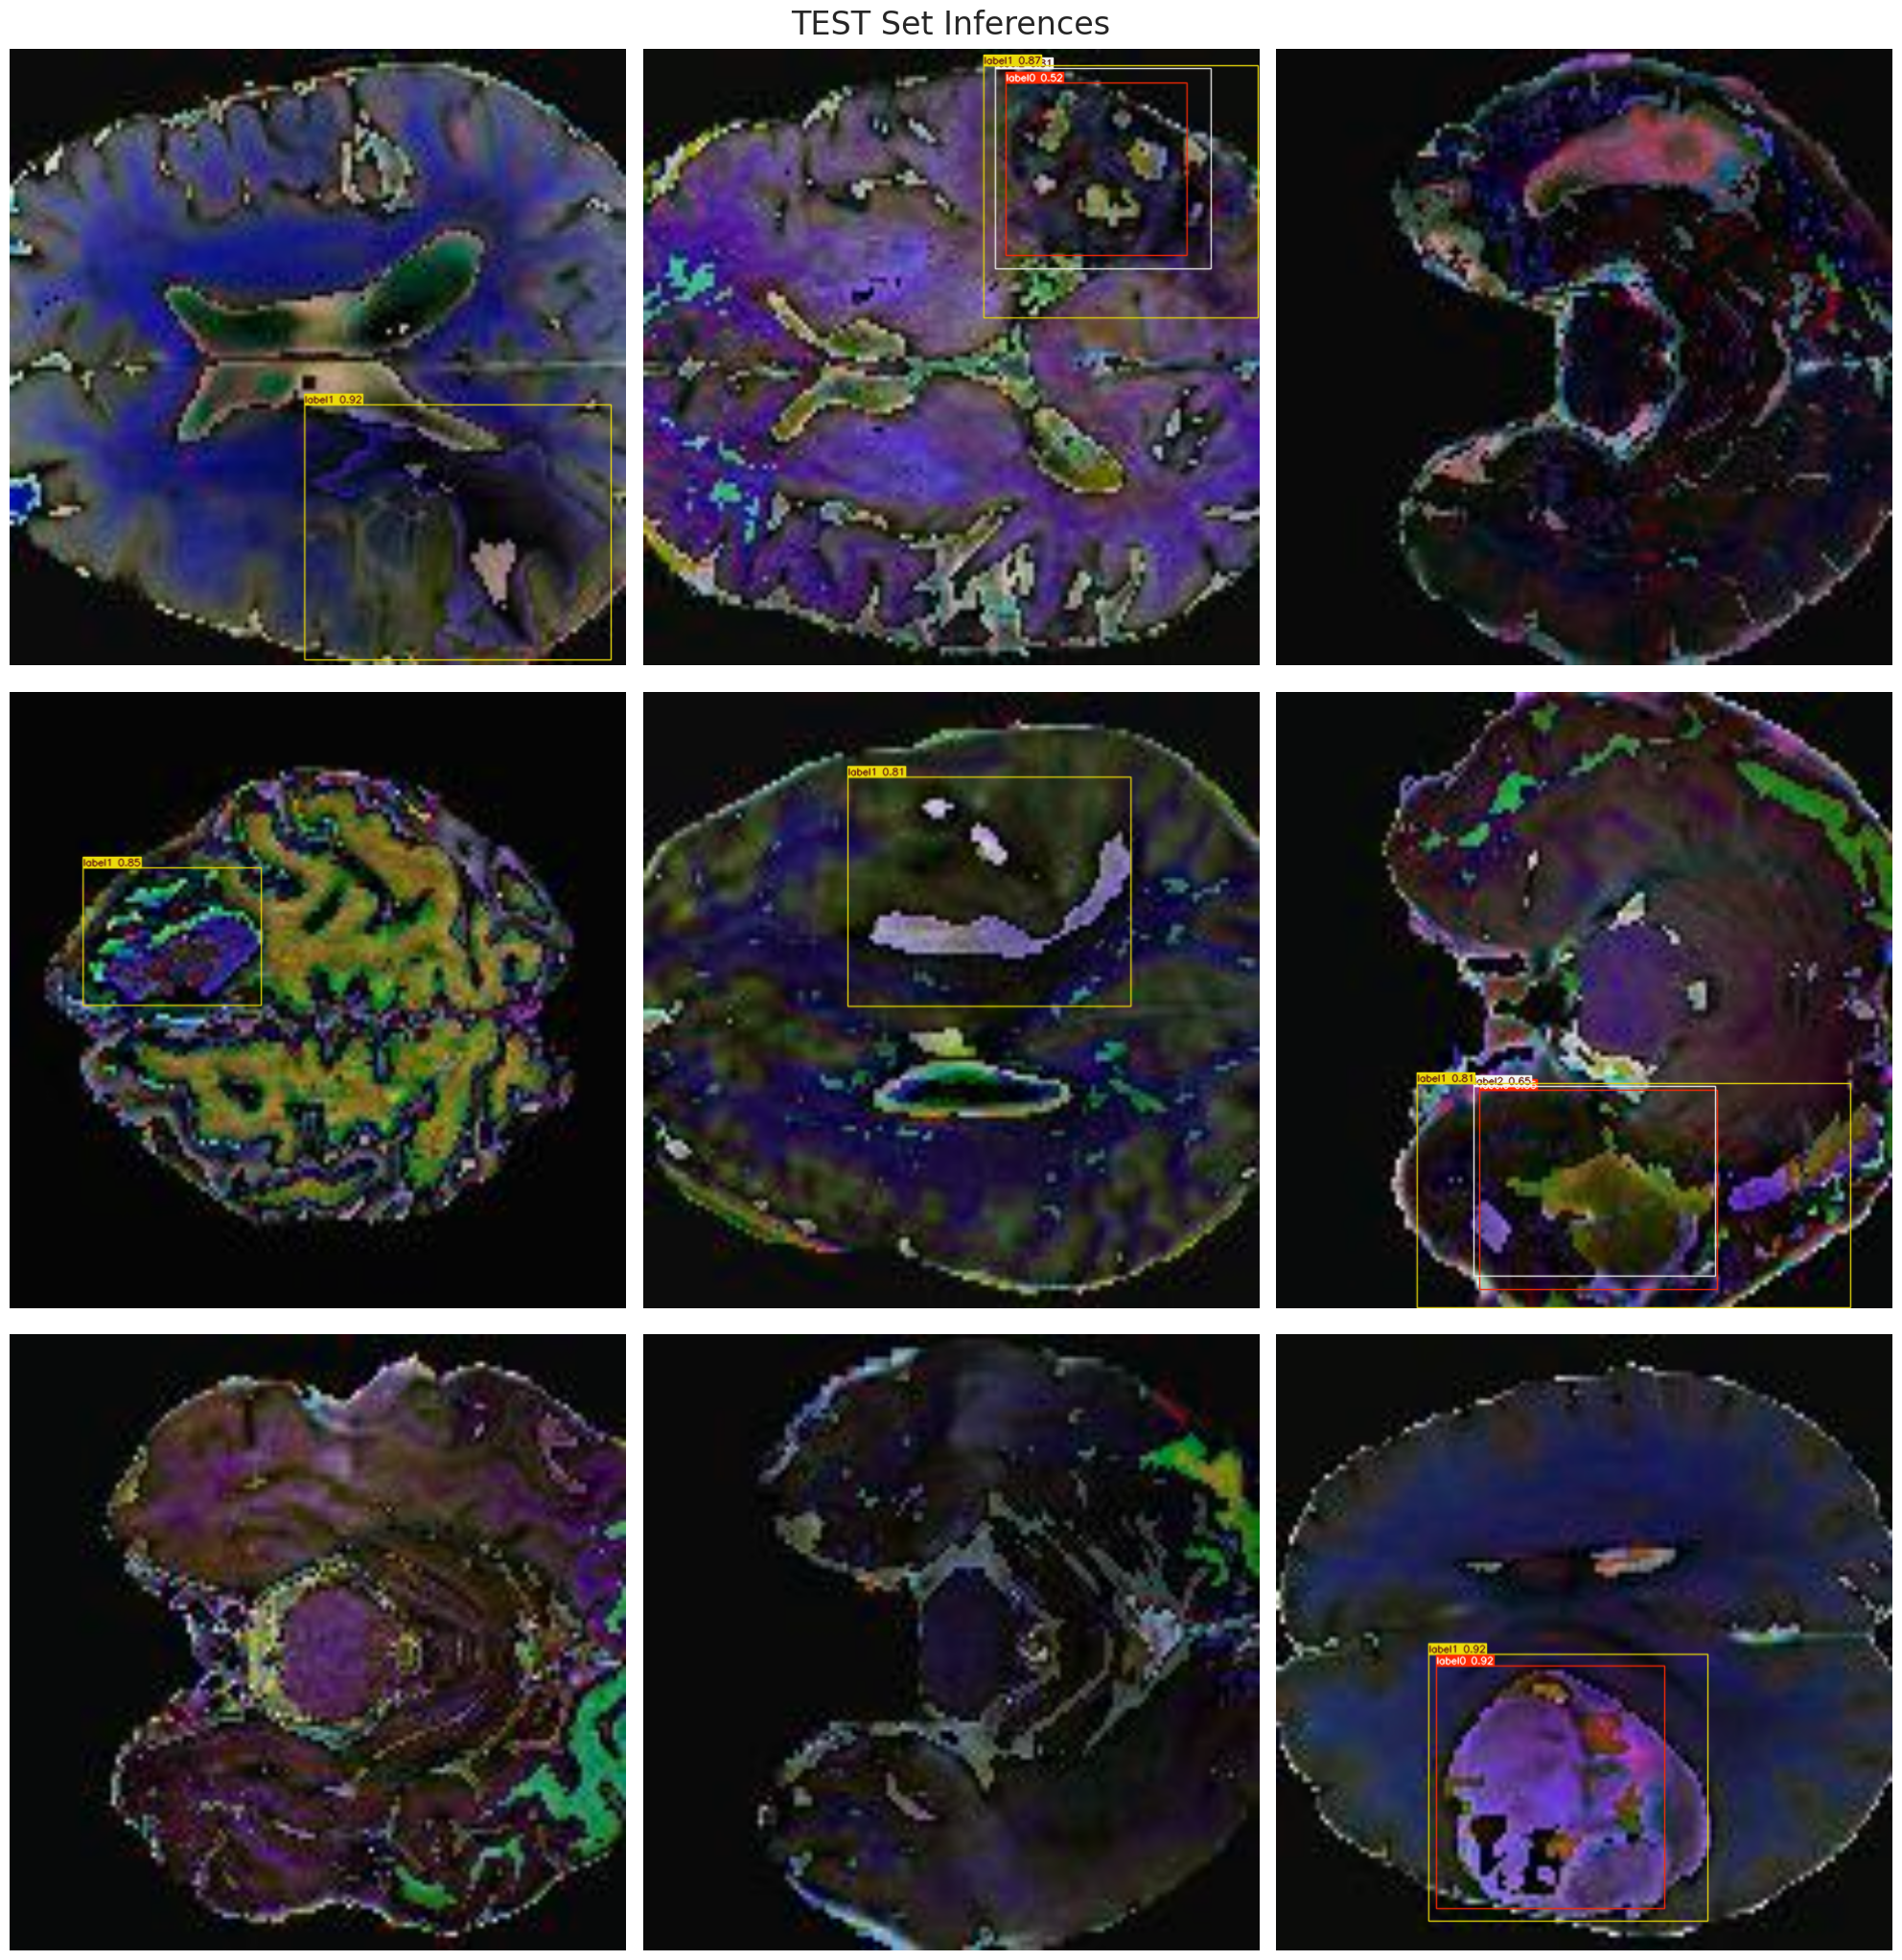

In [ ]:
infer_images()


0: 640x640 1 label1, 28.8ms
Speed: 2.4ms preprocess, 28.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'label0', 1: 'label1', 2: 'label2'}
obb: None
orig_img: array([[[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 16, 20],
        [17, 16, 20],
        [17, 16, 20]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 16, 20],
        [17, 16, 20],
        [17, 16, 20]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 16, 20],
        [17, 16, 20],
        [17, 16, 20]],

       ...,

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [17, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
     

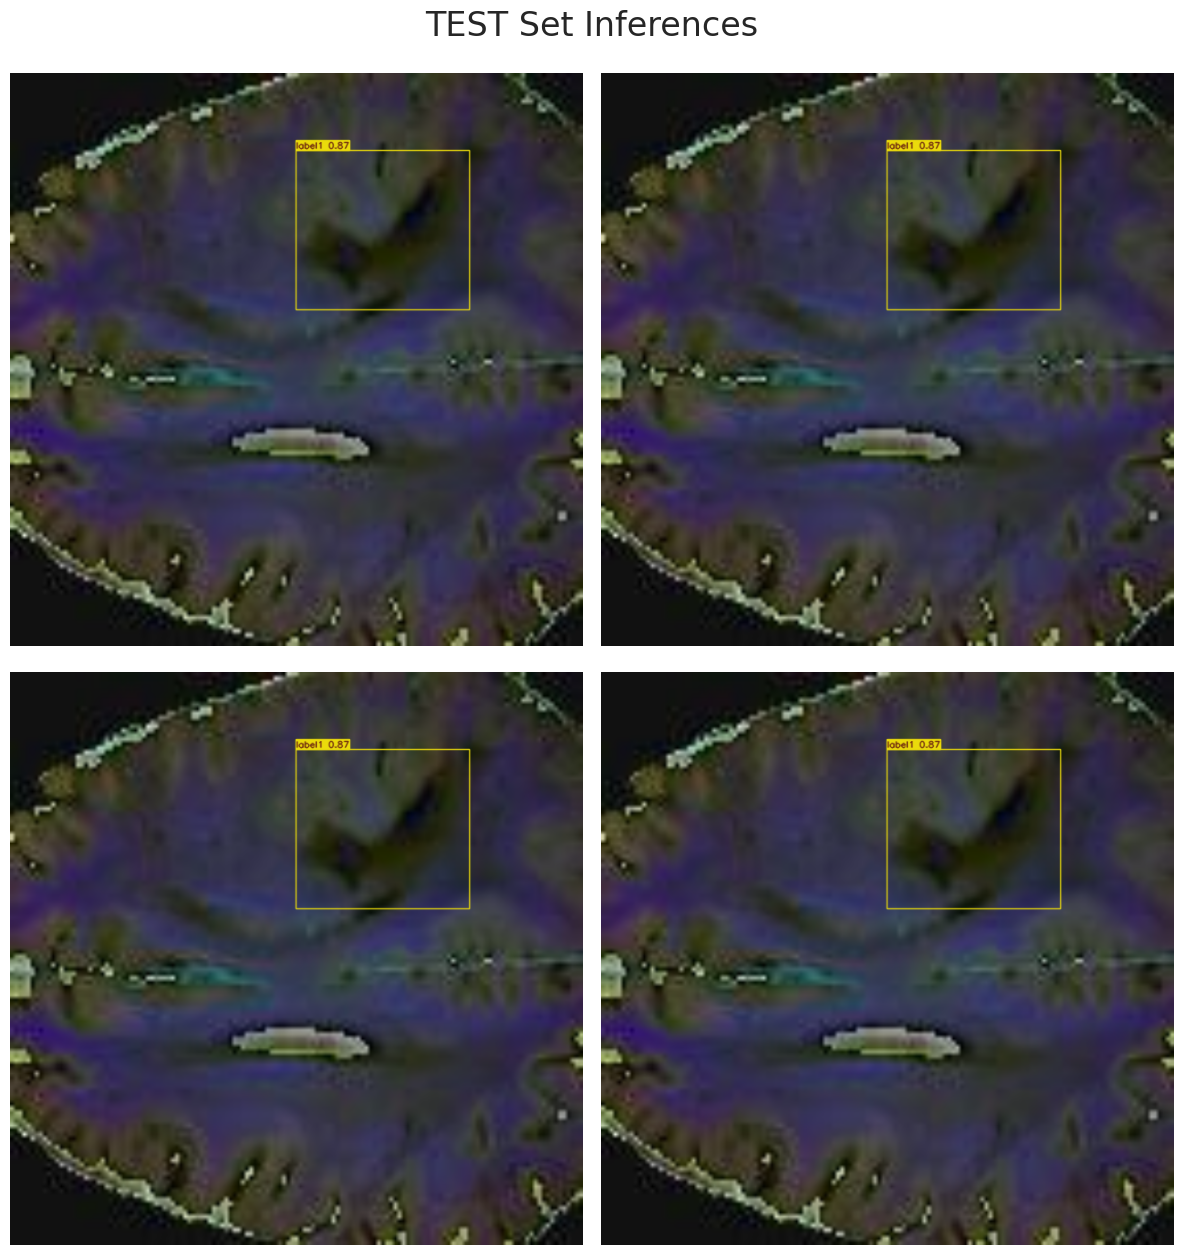

In [ ]:
infer_single_image(6)

#### Format and download model weights

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!zip -r /content/tumor_identification_model.zip /content/tumor_identification_model

  adding: content/tumor_identification_model/ (stored 0%)
  adding: content/tumor_identification_model/detect/ (stored 0%)
  adding: content/tumor_identification_model/detect/val/ (stored 0%)
  adding: content/tumor_identification_model/detect/val/val_batch1_pred.jpg (deflated 10%)
  adding: content/tumor_identification_model/detect/val/PR_curve.png (deflated 11%)
  adding: content/tumor_identification_model/detect/val/val_batch1_labels.jpg (deflated 10%)
  adding: content/tumor_identification_model/detect/val/val_batch2_labels.jpg (deflated 11%)
  adding: content/tumor_identification_model/detect/val/R_curve.png (deflated 12%)
  adding: content/tumor_identification_model/detect/val/val_batch2_pred.jpg (deflated 11%)
  adding: content/tumor_identification_model/detect/val/confusion_matrix.png (deflated 29%)
  adding: content/tumor_identification_model/detect/val/F1_curve.png (deflated 11%)
  adding: content/tumor_identification_model/detect/val/P_curve.png (deflated 12%)
  adding: cont

#### Load Model from zip file and predict with dataset

In [ ]:
def load_tumor_detection_model():
  # !unzip tumor_detection_model.zip -d tumor_detection_model

  # Define the path to the directory
  post_training_files_path = '/content/tumor_detection_model/content/tumor_identification_model/detect/train'

  # Construct the path to the best model weights file using os.path.join
  best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

  # Load the best model weights into the YOLO model
  best_model = YOLO(best_model_path)

  return best_model
  # # Validate the best model using the validation set with default parameters
  # metrics = best_model.val(split='val')

In [ ]:
!unzip tumor_identification_model.zip -d tumor_detection_model

Archive:  tumor_identification_model.zip
replace tumor_detection_model/content/tumor_identification_model/detect/val/val_batch1_pred.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
best_model = load_tumor_detection_model()

In [ ]:
best_model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

##### Infer from image upload

Saving 62067ef3-82ff-4a13-b1f6-7773bdc5b0f8.jfif to 62067ef3-82ff-4a13-b1f6-7773bdc5b0f8.jfif

0: 640x640 1 label1, 16.0ms
Speed: 6.0ms preprocess, 16.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


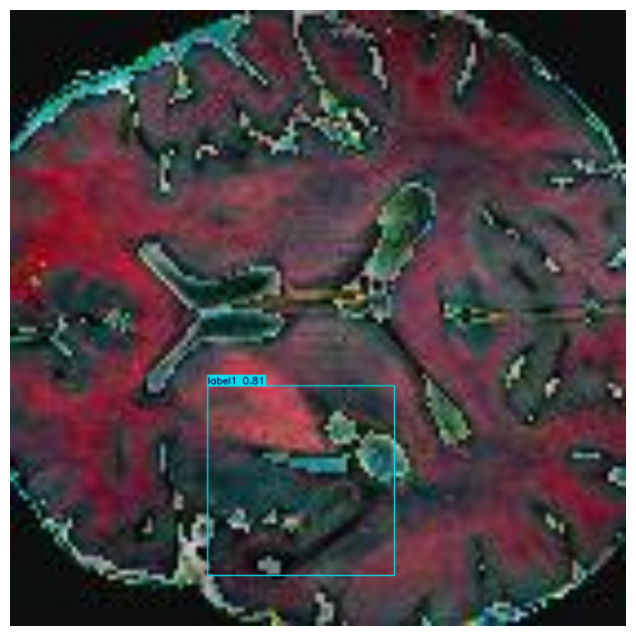

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Function to upload and infer a single image
def infer_uploaded_image():
    # Upload an image file from local
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Load image
        image_path = filename  # Since uploaded will contain the image path
        image = cv2.imread(image_path)

        if image is not None:
            # Resize and normalize the image
            resized_image = resize_image(image, size=(640, 640))
            normalized_image = normalize_image(resized_image)

            # Convert the normalized image to uint8
            normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

            # Perform inference
            results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

            # Plot the image with predictions (bounding boxes and labels)
            annotated_image = results[0].plot(line_width=1)

            # Convert to RGB for plotting
            annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

            # Display the result
            plt.figure(figsize=(8, 8))
            plt.imshow(annotated_image_rgb)
            plt.axis('off')
            plt.show()
        else:
            print(f"Failed to load image {image_path}")

# Helper functions
def normalize_image(image):
    return image / 255.0

def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Call the function to upload and infer
infer_uploaded_image()


## For Brats datset

In [ ]:
# brats dataset for highly detailed MRI scans
!kaggle datasets download -d awsaf49/brats2020-training-data

Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats2020-training-data
License(s): CC0-1.0
100% 6.75G/6.76G [03:57<00:00, 36.1MB/s]
100% 6.76G/6.76G [03:57<00:00, 30.6MB/s]


In [ ]:
!unzip brats2020-training-data.zip -d brats

Streaming output truncated to the last 5000 lines.
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_63.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_64.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_65.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_66.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_67.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_68.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_69.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_7.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_70.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_71.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slice_72.h5  
  inflating: brats/BraTS2020_training_data/content/data/volume_70_slic

In [ ]:
import h5py

# Path to the .h5 file
h5_file_path = '/content/brats/BraTS2020_training_data/content/data/volume_100_slice_0.h5'

# Open the .h5 file
with h5py.File(h5_file_path, 'r') as h5_file:
    # List all groups/keys in the file
    print("Keys in the file: ", list(h5_file.keys()))

    # If there are subgroups, we need to explore further
    for key in h5_file.keys():
        group = h5_file[key]
        print(f"Key: {key}, Type: {type(group)}")

        # If it's a dataset (likely the case with images), print its shape
        if isinstance(group, h5py.Dataset):
            print(f"Shape of {key}: {group.shape}")
        elif isinstance(group, h5py.Group):
            # If it's a group, let's explore its subkeys
            print(f"Subkeys in {key}: {list(group.keys())}")

Keys in the file:  ['image', 'mask']
Key: image, Type: <class 'h5py._hl.dataset.Dataset'>
Shape of image: (240, 240, 4)
Key: mask, Type: <class 'h5py._hl.dataset.Dataset'>
Shape of mask: (240, 240, 3)


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def render_and_save_from_h5(h5_file_path, save=False, channel=0, file_name='sample_brats_image.jpg'):
  # Open the .h5 file
  with h5py.File(h5_file_path, 'r') as h5_file:
      # List all groups in the file
      print("Keys in the file: ", list(h5_file.keys()))

      # Extracting the images dataset
      dataset = h5_file['image'][:]

      # Check the shape of the dataset
      print("Shape of the dataset: ", dataset.shape)

      # Let's render the first channel of the dataset (assuming it's a multichannel image)
      image = dataset[:, :, channel]  # Select the first channel

      # Save the image as a JPG file using matplotlib
      if save:
        plt.imshow(image)
        # plt.title('Sample Image from BRATS Dataset - Channel 0')
        plt.savefig(file_name, format='jpg')
      else:
        plt.imshow(image)
        plt.title('Sample Image from BRATS Dataset - Channel 0')

      # If you don't want the plot to display while saving:
      # plt.close()


Keys in the file:  ['image', 'mask']
Shape of the dataset:  (240, 240, 4)


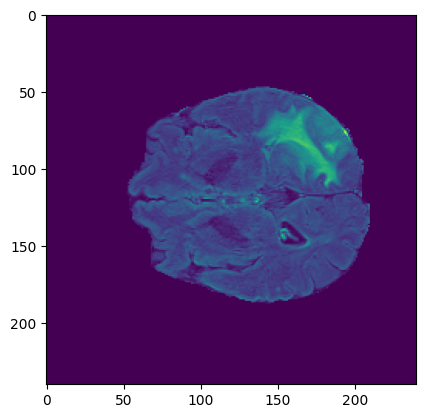

In [ ]:
# Path to the .h5 file
h5_file_path = '/content/brats/BraTS2020_training_data/content/data/volume_41_slice_67.h5'
render_and_save_from_h5(h5_file_path, save=True, channel=0, file_name='test_mri.jpg')

In [ ]:
import pandas as pd


brats_metadata = pd.read_csv('/content/brats/BraTS20 Training Metadata.csv')
brats_metadata

slice_path  target  volume  \
0      ../input/brats2020-training-data/BraTS2020_tra...       0      41   
1      ../input/brats2020-training-data/BraTS2020_tra...       0      41   
2      ../input/brats2020-training-data/BraTS2020_tra...       0      41   
3      ../input/brats2020-training-data/BraTS2020_tra...       0      41   
4      ../input/brats2020-training-data/BraTS2020_tra...       0      41   
...                                                  ...     ...     ...   
57190  ../input/brats2020-training-data/BraTS2020_tra...       0     241   
57191  ../input/brats2020-training-data/BraTS2020_tra...       0     241   
57192  ../input/brats2020-training-data/BraTS2020_tra...       0     241   
57193  ../input/brats2020-training-data/BraTS2020_tra...       0     241   
57194  ../input/brats2020-training-data/BraTS2020_tra...       0     241   

       slice  label0_pxl_cnt  label1_pxl_cnt  label2_pxl_cnt  background_ratio  
0          0               0               0               0               1.0  
1          1               0               0               0               1.0  
2          2               0               0               0               1.0  
3          3               0               0               0               1.0  
4          4               0               0               0               1.0  
...      ...             ...             ...             ...               ...  
57190    150               0               0               0               1.0  
57191    151               0               0               0               1.0  
57192    152               0               0               0               1.0  
57193    153               0               0               0               1.0  
57194    154               0               0               0               1.0  

[57195 rows x 8 columns]

In [ ]:
# Install required libraries
!pip install nibabel
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.2.0


In [ ]:
import os
import cv2
import random
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps
import nibabel as nib
import keras
import keras.backend as K
from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing

ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

### 3. Dataset Information


The Brain Tumor Segmentation (BraTS) 2020 dataset is a collection of multimodal Magnetic Resonance Imaging (MRI) scans used for the segmentation of brain tumors.

It includes MRI scans from glioma patients, providing four different MRI modalities (means 4 channels of information - 4 different volumes of the same region) per patient:

Native (T1)
Post-contrast T1-weighted (T1ce - contrast enhanced)
T2-weighted (T2)
T2-FLAIR (T2 - Fluid Attenuated Inversion Recovery)
These scans come with expert-annotated segmentation masks that delineate the tumor into various sub-regions, such as the necrotic and non-enhancing tumor core, the peritumoral edema, and the enhancing tumor.

Annotations (labels):

Label 0: Not Tumor (NT) volume

Label 1: Necrotic and non-enhancing tumor core (NCR/NET)

Label 2: Peritumoral edema (ED)

Label 3: Missing (No pixels in all the volumes contain label 3)

Label 4: GD-enhancing tumor (ET)

As there are no pixels with the label 3, we will be replacing label 3 with label 4 so that there is continuity between the labels.

Now that we have downloaded the dataset, let's try to explore & understand it!

Inside the brats20-dataset-training-validation folder, you will find two datasets: one for Training and one for Validation. If you open the BraTS2020_TrainingData folder, you will notice that it contains another folder, that contains 369 samples (which are patients here).

In [ ]:
# Define paths
TRAIN_DIR = '/content/brats/BraTS2020_training_data/content/data'
# VALID_DIR = '/content/brats/Validation/'

# Function to load NIfTI files and preprocess
def load_nifti_image(filepath):
    img = nib.load(filepath)
    img = img.get_fdata()
    # Normalize the image
    img = (img - np.mean(img)) / np.std(img)
    return img

# Function to extract data and labels
def extract_data_labels(directory):
    data = []
    labels = []
    for subject in os.listdir(directory):
        subject_path = os.path.join(directory, subject)
        if os.path.isdir(subject_path):
            # Paths to different modalities
            flair_path = os.path.join(subject_path, f"{subject}_flair.nii.gz")
            t1_path = os.path.join(subject_path, f"{subject}_t1.nii.gz")
            t1ce_path = os.path.join(subject_path, f"{subject}_t1ce.nii.gz")
            t2_path = os.path.join(subject_path, f"{subject}_t2.nii.gz")
            seg_path = os.path.join(subject_path, f"{subject}_seg.nii.gz")

            # Check if all files exist
            if all(os.path.exists(p) for p in [flair_path, t1_path, t1ce_path, t2_path, seg_path]):
                # Load images
                flair = load_nifti_image(flair_path)
                t1 = load_nifti_image(t1_path)
                t1ce = load_nifti_image(t1ce_path)
                t2 = load_nifti_image(t2_path)

                # Stack modalities along the channel dimension
                img = np.stack([flair, t1, t1ce, t2], axis=-1)

                # For classification, we can use the presence of any tumor as positive
                seg = load_nifti_image(seg_path)
                label = 1 if np.any(seg > 0) else 0

                data.append(img)
                labels.append(label)
    return np.array(data), np.array(labels)

# Extract training data
print("Loading training data...")
X_train, y_train = extract_data_labels(TRAIN_DIR)
print(f"Training samples: {X_train.shape[0]}")

# # Extract validation data
# print("Loading validation data...")
# X_valid, y_valid = extract_data_labels(VALID_DIR)
# print(f"Validation samples: {X_valid.shape[0]}")


Loading training data...
Training samples: 0
